Miranda Bowser

11/21/23

Dr. Silva

Analysis Report

In this assignment I will be pulling and comparing data from the streaming platform Spotify. With Spotify, you can enjoy and access millions of songs and other works from artists/creators all around the world. Spotify is a digital music, podcast, and video service. 
In order to complete this report, I decided to pull two of my favorite Spotify albums. The first one is by Drake called "Certified Lover Boy." It's more rap and hip-hop; definitely the type of music I listen to when I'm hanging with friends or throwing a party. The second album I'm using is called "Footprints I Found" by David Kushner. He isn't a well known artist but he makes great music. Kushner makes chill, mellow pop music. I listen to him more on a day to day basis. I decided to use these two albums for this analysis out of curiosity as to what similarities I could find with the two albums being from completely different genres.

In [1]:
import requests 
import pandas as pd 
import base64
import json
import urllib
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
Client_ID = pd.read_csv('Spotify_Keys_9-19-23.txt')['Client_ID'].iloc[0] 

In [3]:
#Client_ID

In [4]:
Client_Secret = pd.read_csv('Spotify_Keys_9-19-23.txt')['Client_Secret'].iloc[0]

In [5]:
#Client_Secret

In [6]:
client_cred = base64.b64encode(str(Client_ID + ":" + Client_Secret).encode("ascii"))

In [7]:
#client_cred

In [8]:
headers = {"Authorization": "Basic {}".format(client_cred.decode("ascii"))}

In [9]:
#headers

In [10]:
payload = {'grant_type' : 'client_credentials'}
url = 'https://accounts.spotify.com/api/token'

In [11]:
session_key_response = requests.post(url = url, data = payload, headers = headers)

In [12]:
session_key_response.status_code

200

In [13]:
#session_key_response.json()['access_token']

In [14]:
session_headers = {"Authorization": "Bearer {}".format(session_key_response.json()['access_token'])}

In [15]:
#session_headers

This is where I pulled all of the data for Drakes album to use for this report.

In [16]:
Drake_album = '3SpBlxme9WbeQdI9kx7KAV'

In [17]:
album_url = 'https://api.spotify.com/v1/albums/{}/tracks'.format(Drake_album)

In [18]:
response = requests.get(url = album_url, headers = session_headers)

In [19]:
data = json.loads(response.text)
data['items'][0]['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/3TVXtAsR1Inumwj472S9r4'},
  'href': 'https://api.spotify.com/v1/artists/3TVXtAsR1Inumwj472S9r4',
  'id': '3TVXtAsR1Inumwj472S9r4',
  'name': 'Drake',
  'type': 'artist',
  'uri': 'spotify:artist:3TVXtAsR1Inumwj472S9r4'}]

In [20]:
search_df = pd.DataFrame(data['items'])
search_df.head()

,artists,available_markets,disc_number,duration_ms,explicit,external_urls,href,id,is_local,name,preview_url,track_number,type,uri
0,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,336511,True,{'spotify': 'https://open.spotify.com/track/2H...,https://api.spotify.com/v1/tracks/2HSmyk2qMN8W...,2HSmyk2qMN8WQjuGhaQgCk,False,Champagne Poetry,None,1,track,spotify:track:2HSmyk2qMN8WQjuGhaQgCk
1,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,178623,True,{'spotify': 'https://open.spotify.com/track/6j...,https://api.spotify.com/v1/tracks/6jy9yJfgCsMH...,6jy9yJfgCsMHdu2Oz4BGKX,False,Papi’s Home,None,2,track,spotify:track:6jy9yJfgCsMHdu2Oz4BGKX
2,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,221979,True,{'spotify': 'https://open.spotify.com/track/37...,https://api.spotify.com/v1/tracks/37Nqx7iavZpo...,37Nqx7iavZpotJSDXZWbJ3,False,Girls Want Girls (with Lil Baby),None,3,track,spotify:track:37Nqx7iavZpotJSDXZWbJ3
3,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,296568,True,{'spotify': 'https://open.spotify.com/track/61...,https://api.spotify.com/v1/tracks/61S79KIVA4I9...,61S79KIVA4I9FXbnsylEHT,False,In The Bible (with Lil Durk & Giveon),None,4,track,spotify:track:61S79KIVA4I9FXbnsylEHT
4,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,228461,True,{'spotify': 'https://open.spotify.com/track/4V...,https://api.spotify.com/v1/tracks/4VCbgIdr8pte...,4VCbgIdr8ptegWeJpqLVHH,False,Love All (with JAY-Z),None,5,track,spotify:track:4VCbgIdr8ptegWeJpqLVHH


In [21]:
','.join(list(search_df['id']))

'2HSmyk2qMN8WQjuGhaQgCk,6jy9yJfgCsMHdu2Oz4BGKX,37Nqx7iavZpotJSDXZWbJ3,61S79KIVA4I9FXbnsylEHT,4VCbgIdr8ptegWeJpqLVHH,40iJIUlhi6renaREYGeIDS,0k1WUmIRnG3xU6fvvDVfRG,4s7QLoImIwmPi9L6dq1nVW,34D6FJysnQioVingDKufuf,11pEKMLmavDu8fxOB5QjbQ,1PDP7mLiAMwhfmgIwzhOm2,2tUL6dZf1mywCj5WvCPZw6,2BcMwX1MPV6ZHP4tUT9uq6,42m3eP1JJhtzffal9B136J,2Q3jFbyE61mCjS3SkW4toJ,08XWh5c0BMyD1nKVxxl91z,5ScbulRnixQ2XAdvrPMFjz,50ceCGZ3oD3U5caQV5bP6f,7F9cT6hIRhnFCYP6GKS0tf,3RkNXZvOSMMElmmXztDc94'

In [22]:
audio_features_url = 'https://api.spotify.com/v1/audio-features?ids={}'.format(','.join(list(search_df['id'])))
audio_features_url

'https://api.spotify.com/v1/audio-features?ids=2HSmyk2qMN8WQjuGhaQgCk,6jy9yJfgCsMHdu2Oz4BGKX,37Nqx7iavZpotJSDXZWbJ3,61S79KIVA4I9FXbnsylEHT,4VCbgIdr8ptegWeJpqLVHH,40iJIUlhi6renaREYGeIDS,0k1WUmIRnG3xU6fvvDVfRG,4s7QLoImIwmPi9L6dq1nVW,34D6FJysnQioVingDKufuf,11pEKMLmavDu8fxOB5QjbQ,1PDP7mLiAMwhfmgIwzhOm2,2tUL6dZf1mywCj5WvCPZw6,2BcMwX1MPV6ZHP4tUT9uq6,42m3eP1JJhtzffal9B136J,2Q3jFbyE61mCjS3SkW4toJ,08XWh5c0BMyD1nKVxxl91z,5ScbulRnixQ2XAdvrPMFjz,50ceCGZ3oD3U5caQV5bP6f,7F9cT6hIRhnFCYP6GKS0tf,3RkNXZvOSMMElmmXztDc94'

In [23]:
features_response = requests.get(url = audio_features_url, headers = session_headers)

In [24]:
features_response.status_code

200

In [25]:
features = features_response.json()

In [26]:
features.keys()

dict_keys(['audio_features'])

In [27]:
features['audio_features'][0]

{'danceability': 0.423,
 'energy': 0.667,
 'key': 6,
 'loudness': -7.012,
 'mode': 0,
 'speechiness': 0.326,
 'acousticness': 0.758,
 'instrumentalness': 0,
 'liveness': 0.246,
 'valence': 0.496,
 'tempo': 86.743,
 'type': 'audio_features',
 'id': '2HSmyk2qMN8WQjuGhaQgCk',
 'uri': 'spotify:track:2HSmyk2qMN8WQjuGhaQgCk',
 'track_href': 'https://api.spotify.com/v1/tracks/2HSmyk2qMN8WQjuGhaQgCk',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2HSmyk2qMN8WQjuGhaQgCk',
 'duration_ms': 336511,
 'time_signature': 4}

In [28]:
drake_features_df = pd.DataFrame(features['audio_features'])
drake_features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.423,0.667,6,-7.012,0,0.326,0.758,0.000000,0.246,0.496,86.743,audio_features,2HSmyk2qMN8WQjuGhaQgCk,spotify:track:2HSmyk2qMN8WQjuGhaQgCk,https://api.spotify.com/v1/tracks/2HSmyk2qMN8W...,https://api.spotify.com/v1/audio-analysis/2HSm...,336511,4
1,0.701,0.741,2,-6.157,1,0.313,0.112,0.000000,0.699,0.588,140.177,audio_features,6jy9yJfgCsMHdu2Oz4BGKX,spotify:track:6jy9yJfgCsMHdu2Oz4BGKX,https://api.spotify.com/v1/tracks/6jy9yJfgCsMH...,https://api.spotify.com/v1/audio-analysis/6jy9...,178623,4
2,0.767,0.438,7,-8.726,0,0.290,0.181,0.000000,0.142,0.381,86.975,audio_features,37Nqx7iavZpotJSDXZWbJ3,spotify:track:37Nqx7iavZpotJSDXZWbJ3,https://api.spotify.com/v1/tracks/37Nqx7iavZpo...,https://api.spotify.com/v1/audio-analysis/37Nq...,221980,4
3,0.686,0.385,7,-8.350,0,0.297,0.614,0.000000,0.131,0.147,143.070,audio_features,61S79KIVA4I9FXbnsylEHT,spotify:track:61S79KIVA4I9FXbnsylEHT,https://api.spotify.com/v1/tracks/61S79KIVA4I9...,https://api.spotify.com/v1/audio-analysis/61S7...,296568,4
4,0.730,0.576,2,-5.442,1,0.287,0.354,0.000036,0.150,0.155,92.131,audio_features,4VCbgIdr8ptegWeJpqLVHH,spotify:track:4VCbgIdr8ptegWeJpqLVHH,https://api.spotify.com/v1/tracks/4VCbgIdr8pte...,https://api.spotify.com/v1/audio-analysis/4VCb...,228461,4


This portion is where I pulled the data for David Kushners album.

In [30]:
kushner_album = '5bXx1ncSvWPtNAuecQgsHf'

In [31]:
kushner_url = 'https://api.spotify.com/v1/albums/{}/tracks'.format(kushner_album)

In [32]:
response2 = requests.get(url = kushner_url, headers = session_headers)

In [33]:
response2.status_code

200

In [34]:
kushner_data = json.loads(response2.text)
kushner_data['items'][0]['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/33NVpKoXjItPwUJTMZIOiY'},
  'href': 'https://api.spotify.com/v1/artists/33NVpKoXjItPwUJTMZIOiY',
  'id': '33NVpKoXjItPwUJTMZIOiY',
  'name': 'David Kushner',
  'type': 'artist',
  'uri': 'spotify:artist:33NVpKoXjItPwUJTMZIOiY'}]

In [36]:
kushner_df = pd.DataFrame(kushner_data['items'])
kushner_df.head()

,artists,available_markets,disc_number,duration_ms,explicit,external_urls,href,id,is_local,name,preview_url,track_number,type,uri
0,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,174186,False,{'spotify': 'https://open.spotify.com/track/4r...,https://api.spotify.com/v1/tracks/4r4yF6BGAm4o...,4r4yF6BGAm4oy4MnOYjSjI,False,Cigarettes,None,1,track,spotify:track:4r4yF6BGAm4oy4MnOYjSjI
1,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,179173,False,{'spotify': 'https://open.spotify.com/track/40...,https://api.spotify.com/v1/tracks/40dfo65kBJa1...,40dfo65kBJa1UgzkD652Gl,False,Burn,None,2,track,spotify:track:40dfo65kBJa1UgzkD652Gl
2,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,172680,False,{'spotify': 'https://open.spotify.com/track/4H...,https://api.spotify.com/v1/tracks/4HnVzg7n6aIP...,4HnVzg7n6aIPV7TCGRMR6k,False,Cannon Beach,None,3,track,spotify:track:4HnVzg7n6aIPV7TCGRMR6k
3,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,187293,False,{'spotify': 'https://open.spotify.com/track/0c...,https://api.spotify.com/v1/tracks/0c8K5IUrmVli...,0c8K5IUrmVlieC0Fc0d8tV,False,Mr. Forgettable,None,4,track,spotify:track:0c8K5IUrmVlieC0Fc0d8tV
4,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,164186,False,{'spotify': 'https://open.spotify.com/track/6e...,https://api.spotify.com/v1/tracks/6e0Gfl49FN9m...,6e0Gfl49FN9m2c8QaB9vFr,False,Look Back & Laugh,None,5,track,spotify:track:6e0Gfl49FN9m2c8QaB9vFr


In [37]:
','.join(list(kushner_df['id']))

'4r4yF6BGAm4oy4MnOYjSjI,40dfo65kBJa1UgzkD652Gl,4HnVzg7n6aIPV7TCGRMR6k,0c8K5IUrmVlieC0Fc0d8tV,6e0Gfl49FN9m2c8QaB9vFr,5iu3rl4feYeRgR1DW0ydNU,2fkdhQW8R8QqE93iRFPYsl'

In [38]:
kushner_url = 'https://api.spotify.com/v1/audio-features?ids={}'.format(','.join(list(kushner_df['id'])))
kushner_url

'https://api.spotify.com/v1/audio-features?ids=4r4yF6BGAm4oy4MnOYjSjI,40dfo65kBJa1UgzkD652Gl,4HnVzg7n6aIPV7TCGRMR6k,0c8K5IUrmVlieC0Fc0d8tV,6e0Gfl49FN9m2c8QaB9vFr,5iu3rl4feYeRgR1DW0ydNU,2fkdhQW8R8QqE93iRFPYsl'

In [39]:
features_response2 = requests.get(url = kushner_url, headers = session_headers)

In [40]:
features_response2.status_code

200

In [41]:
kushner_features = features_response2.json()

In [42]:
kushner_features.keys()

dict_keys(['audio_features'])

In [43]:
kushner_features['audio_features'][0]

{'danceability': 0.536,
 'energy': 0.367,
 'key': 1,
 'loudness': -9.435,
 'mode': 1,
 'speechiness': 0.0296,
 'acousticness': 0.699,
 'instrumentalness': 0.000159,
 'liveness': 0.131,
 'valence': 0.0492,
 'tempo': 118.004,
 'type': 'audio_features',
 'id': '4r4yF6BGAm4oy4MnOYjSjI',
 'uri': 'spotify:track:4r4yF6BGAm4oy4MnOYjSjI',
 'track_href': 'https://api.spotify.com/v1/tracks/4r4yF6BGAm4oy4MnOYjSjI',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4r4yF6BGAm4oy4MnOYjSjI',
 'duration_ms': 174187,
 'time_signature': 4}

In [114]:
kushner_features_df = pd.DataFrame(kushner_features['audio_features'])
kushner_features_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.536,0.367,1,-9.435,1,0.0296,0.699,0.000159,0.131,0.0492,118.004,audio_features,4r4yF6BGAm4oy4MnOYjSjI,spotify:track:4r4yF6BGAm4oy4MnOYjSjI,https://api.spotify.com/v1/tracks/4r4yF6BGAm4o...,https://api.spotify.com/v1/audio-analysis/4r4y...,174187,4
1,0.574,0.408,0,-9.733,1,0.0359,0.799,0.002950,0.150,0.1340,126.127,audio_features,40dfo65kBJa1UgzkD652Gl,spotify:track:40dfo65kBJa1UgzkD652Gl,https://api.spotify.com/v1/tracks/40dfo65kBJa1...,https://api.spotify.com/v1/audio-analysis/40df...,179173,4
2,0.557,0.607,11,-6.569,1,0.0366,0.771,0.000002,0.138,0.6190,76.497,audio_features,4HnVzg7n6aIPV7TCGRMR6k,spotify:track:4HnVzg7n6aIPV7TCGRMR6k,https://api.spotify.com/v1/tracks/4HnVzg7n6aIP...,https://api.spotify.com/v1/audio-analysis/4HnV...,172680,4
3,0.564,0.412,8,-9.230,0,0.0274,0.554,0.000000,0.151,0.2900,144.689,audio_features,0c8K5IUrmVlieC0Fc0d8tV,spotify:track:0c8K5IUrmVlieC0Fc0d8tV,https://api.spotify.com/v1/tracks/0c8K5IUrmVli...,https://api.spotify.com/v1/audio-analysis/0c8K...,187293,4
4,0.546,0.332,2,-10.334,1,0.0582,0.611,0.000385,0.123,0.2110,74.938,audio_features,6e0Gfl49FN9m2c8QaB9vFr,spotify:track:6e0Gfl49FN9m2c8QaB9vFr,https://api.spotify.com/v1/tracks/6e0Gfl49FN9m...,https://api.spotify.com/v1/audio-analysis/6e0G...,164187,4
5,0.631,0.348,10,-10.285,1,0.0343,0.926,0.000089,0.295,0.3200,110.019,audio_features,5iu3rl4feYeRgR1DW0ydNU,spotify:track:5iu3rl4feYeRgR1DW0ydNU,https://api.spotify.com/v1/tracks/5iu3rl4feYeR...,https://api.spotify.com/v1/audio-analysis/5iu3...,232992,4
6,0.538,0.562,11,-8.828,1,0.1250,0.895,0.000281,0.177,0.3260,125.088,audio_features,2fkdhQW8R8QqE93iRFPYsl,spotify:track:2fkdhQW8R8QqE93iRFPYsl,https://api.spotify.com/v1/tracks/2fkdhQW8R8Qq...,https://api.spotify.com/v1/audio-analysis/2fkd...,182533,4


After pulling the data and audio features for both albums I decided to put together graphs to get a better understanding of the energy and tempo features for each album. As well as to track whether or not the albums have any main similarities from a more visual aspect.

This first graph is only comparing the energy feature for both albums. It's showing that the Drake has a larger and higher range of energy in his songs than David Kushner does in his album. 

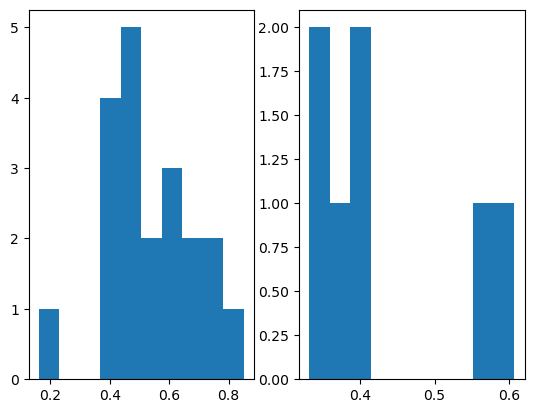

In [45]:
fig1, ax1 = plt.subplots(1, 2)
ax1[0].hist(drake_features_df['energy'])
ax1[1].hist(kushner_features_df['energy'])

plt.show()

This next graph is a scatter plot that shows the crossover between the energy and tempo audio features between both albums. Drakes album has a mixture of low energy and low tempo or medium energy and high tempo. As for the David Kushner album he only has a couple songs with high energy and medium tempo. The majority of his songs have low energy and high tempo. There are no major crossovers I see on this graph.

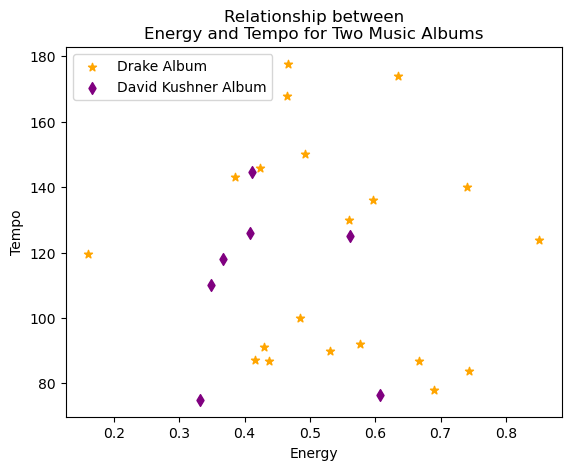

In [116]:
fig2, ax2 = plt.subplots()
ax2.scatter(x = drake_features_df['energy'],
            y = drake_features_df['tempo'],
            label = 'Drake Album',
           color = 'orange',
           marker = '*')
ax2.scatter(x = kushner_features_df['energy'], 
            y = kushner_features_df['tempo'], 
            label = 'David Kushner Album',
           color = 'purple',
           marker = 'd')

ax2.set_xlabel('Energy')
ax2.set_ylabel('Tempo')
ax2.legend()
ax2.set_title('Relationship between\nEnergy and Tempo for Two Music Albums')

plt.show()

In [118]:
kushner_features_df['tempo']

0    118.004
1    126.127
2     76.497
3    144.689
4     74.938
5    110.019
6    125.088
Name: tempo, dtype: float64

This last graph shows the minimum and maximum tempo values in each album. It also provides the median values, this indicates what the average tempo is for each album. The dots represent each individual song and where they sit at on the chart depending on how much tempo is in the song.

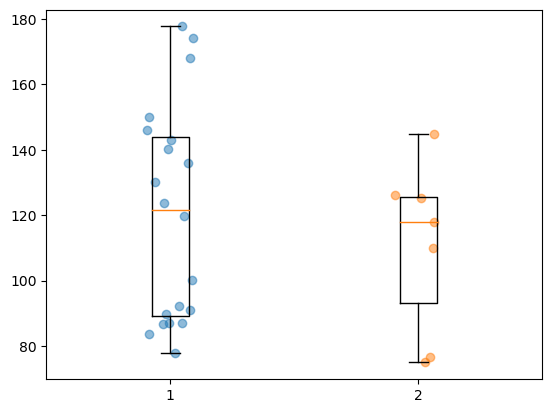

In [108]:
drake_tempo = drake_features_df['tempo']
kushner_tempo = kushner_features_df['tempo']

drake_xs = [1]*len(drake_tempo)
kushner_xs = [2]*len(kushner_tempo)

drake_x_jitter = np.random.uniform(-0.10, .10, len(drake_xs))
kushner_x_jitter = np.random.uniform(-.10, .10, len(kushner_xs))


fig3, ax3 = plt.subplots()
ax3.boxplot(drake_tempo, positions = [1])
ax3.boxplot(kushner_tempo, positions = [2])
ax3.scatter(drake_xs + drake_x_jitter, drake_tempo, alpha = .5)
ax3.scatter(kushner_xs + kushner_x_jitter, kushner_tempo, alpha = .5)



plt.show()

In [110]:
result1 = stats.ttest_ind(drake_tempo, kushner_tempo)
result1

TtestResult(statistic=0.680839990507197, pvalue=0.5022306024361134, df=25.0)

In [112]:
result1.statistic

0.680839990507197

In [113]:
result1.pvalue

0.5022306024361134

In [117]:
round(result1.pvalue, 3)

0.502

Taking a look at the ttest means reviewing the overall pvalue and whether or not it is below 0.05; this indicates if the variables have a good relationship or not. After reviewing the graphs and looking at the ttest I have a better understanding that both of these albums have no correlation to one another. 
On the other hand I did only look at two out of the eleven audio features. If I were to continue this study I would consider looking at different audio features to see if there are any more noticeable similarities between these albums. Given how distinct each album's musical genre is, I'm going to assume that there won't be any major parallels between these albums.